<a href="https://colab.research.google.com/github/jkjh23/busan_AI_2020/blob/master/4_DeepLearning/11-2_LSTM_%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 스탠다드앤푸어 500 데이터세트
- 미국 주식 시장에서 거래되는 모든 @&P 자본 기업들에 대한 주식 가격

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [58]:
dir = "/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/LSTM_Data/all_stocks_5yr.csv"
df = pd.read_csv(dir)
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


- open : 시작 가격
- high : 상한가
- low :  하한가
- close : 종가
- volume : 거래량

# 정렬, 트렌드 시각화
- 505개 주식 중 하나를 선택
- 데이터 프레임을 날짜로 정렬 : 시계열 예측하는 문제에서 시퀀스의 순서는 예측에 매우 중요한 영향을 미친다.
- 순차적으로 정렬된 데이터에서 상한가와 하한가를 플로팅해서 시각적으로 표시
- 조금의 차이는 있지만 상한가와 하한가 두 값 모두 동일한 패턴을 따르는 것을 확인할 수 있다.

In [59]:
df[4000:4005]

,date,open,high,low,close,volume,Name
4000,2013-12-27,52.92,53.050,52.3800,52.55,2355008,ABBV
4001,2013-12-30,52.73,53.030,52.6000,53.01,2898886,ABBV
4002,2013-12-31,52.99,53.060,52.3600,52.81,3019731,ABBV
4003,2014-01-02,52.12,52.330,51.5200,51.98,4569061,ABBV
4004,2014-01-03,52.25,52.665,51.9675,52.30,4794591,ABBV


In [60]:
abbv = df[df['Name'] == 'ABBV']
abbv

,date,open,high,low,close,volume,Name
3777,2013-02-08,36.37,36.420,35.825,36.25,13858795,ABBV
3778,2013-02-11,36.13,36.180,35.750,35.85,6031957,ABBV
3779,2013-02-12,35.77,35.900,35.200,35.42,7473991,ABBV
3780,2013-02-13,35.42,35.570,35.150,35.27,4860053,ABBV
3781,2013-02-14,35.05,36.730,35.010,36.57,7570052,ABBV
...,...,...,...,...,...,...,...
5031,2018-02-01,112.24,117.530,112.230,116.34,9943452,ABBV
5032,2018-02-02,115.50,117.930,114.920,115.17,7184413,ABBV
5033,2018-02-05,113.00,115.535,109.400,109.51,9827825,ABBV
5034,2018-02-06,104.91,113.520,101.000,111.20,14107829,ABBV


In [61]:
len(set(df['Name']))

505

In [62]:
aal = df[df['Name'] == 'AAL']
aal = aal.sort_values('date')
aal

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


Text(0, 0.5, 'Price')

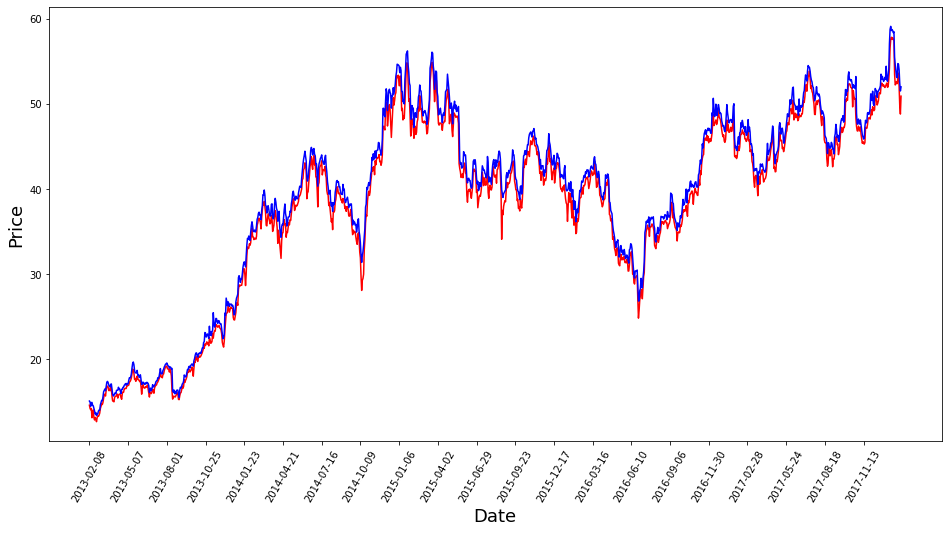

In [63]:
plt.figure(figsize=(16,8))
plt.plot(range(aal.shape[0]), (aal['low']), color='r')
plt.plot(range(aal.shape[0]), (aal['high']), color='b')
plt.xticks(range(0, aal.shape[0], 60), aal['date'].loc[::60], rotation=60)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)

# 데이터프레임을 텐서로 변환
- 두 변수의 연관성이 높으므로 두 변수를 모두 추적하지 않아도 예측 모델링을 하는 데 큰 어려움은 없을 것이다.
- 둘 중 한 변수를 선택해도 관계없지만, 두 변수의 평균값을 사용한다.
- 넘파이 ndarray 타입으로 변환한다.
- 총 1,259개의 관찰 결과가 존재함을 확인하고, 각 결과는 해당 날짜의 AAL 주식의 중간값에 해당한다.

In [64]:
high_prices = aal.loc[:, 'high'].values
low_prices = aal.loc[:, 'low'].values
mid_prices = (high_prices+low_prices)/2.0
high_prices, low_prices, mid_prices

(array([15.12, 15.01, 14.51, ..., 52.39, 51.5 , 51.98]),
 array([14.63, 14.26, 14.1 , ..., 49.75, 48.79, 50.89]),
 array([14.875, 14.635, 14.305, ..., 51.07 , 50.145, 51.435]))

# 데이터 분할
- 테스트 데이터는 전처리된 중간 주식 가격 데이터에서 1000번째 이후로 정한다.
- train_test_split을 사용하면 shuffle되기 때문에 임의로 분할한다. 시계열 데이터는 시간 순서가 중요하기 때문에  train_test_split을 사용하지 않는다.

In [65]:
train_data = mid_prices[:1000]
test_data = mid_prices[1000:]

In [66]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

In [67]:
print(f'{len(train_data)} training and {len(test_data)} total testing instances')

1000 training and 259 total testing instances


# 훈련, 테스트 인스턴스 플롯
- AAL 주식 데이터의 훈련 인스턴스와 테스트 인스턴스를 표준화하지 않은 상태로 플롯
- 스케일링 되어있지 않으며 훈련 데이터는 1000개, 테스트 데이터는 그 1/4 정도임을 확인
- 테스트 데이터는 관찰 수행 기간 동안 40 - 57달러 사이의 가격을 나타낸다.
- 훈련 데이터는 그보다 긴 기간동안 0달러에서 50달러 사이의 가격을 나타낸다.

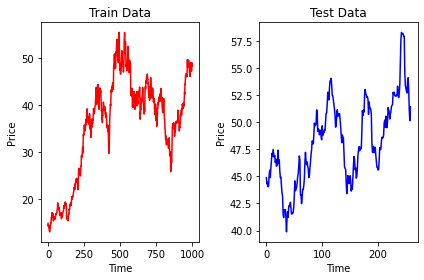

In [68]:
plt.subplot(1,2,1)
plt.plot(range(train_data.shape[0]), train_data, color='r', label='Training split')
plt.title('Train Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend

plt.subplot(1,2,2)
plt.plot(range(test_data.shape[0]), test_data, color='b', label='Training split')
plt.title('Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend

plt.tight_layout()
plt.show()

# 윈도우 방식 표준화
- 0에서 1 사이의 값으로 스케일링
- 표준화는 다양한 머신러닝, 딥러닝에서 일반적으로 사용한다.
- 네트워크는 표준화된 값을 사용해 관련된 표현을 더 잘 잡아낸다는 것을 기억
- 시계열 문제에서는 조금 다른 표준화 전략이 필요(윈도우 표준화)
- 윈도우 표준화 방식을 사용하면 데이터 전체를 한 번에 표준화하는 대신 작은 배치 단위로 표준화할 수 있다.
- ANN이 가장 효과적으로 다루는 값의 범위가 0에서 1 사이의 값이다.
- 윈도우 표준화 단점
  - 배치 단위로 표준화를 수행하면 배치별로 독립적인 표준화가 수행되므로 각 배치 끝에서 지속성이 단절된다. 
  - 윈도우 크기를 적절하게 선택해야 한다.


In [69]:
normalization_window = 250
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
for i in range(0, 1000, normalization_window) :
  scaler.fit(train_data[i:i+normalization_window, :])
  train_data[i:i+normalization_window, :] = scaler.transform(train_data[i:i+normalization_window, :])

In [72]:
test_data = scaler.fit_transform(test_data)

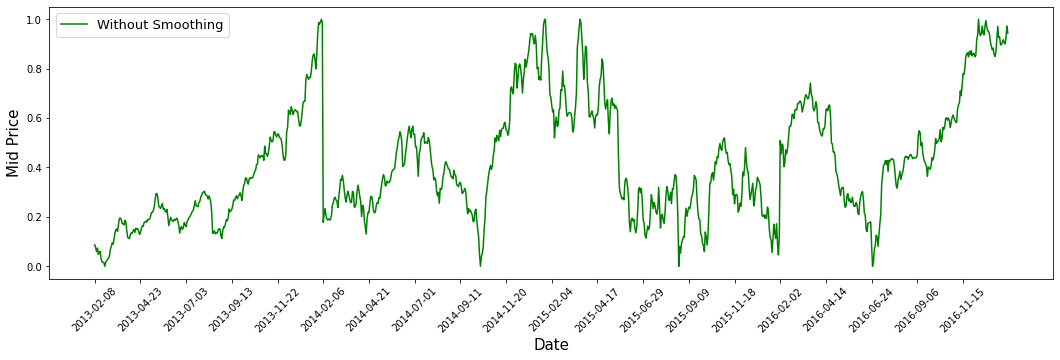

In [80]:
plt.figure(figsize=(18,5))
plt.plot(range(train_data.shape[0]), train_data, color='g', label='Without Smoothing')
plt.xticks(range(0, aal.shape[0]-len(test_data), 50), aal['date'][::50], rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Mid Price', fontsize=15)
plt.legend(fontsize=13)
plt.show()

# 데이터 노이즈 제거
- 지수 평활법(exponential smoothing)
  - 기하급수적으로 감소하는 방식으로 데이터 포인트에 가중치를 부여
  - 최근의 이벤트가 먼 과거의 이벤트보다 현재 데이터 포인트에 더 많은 영향을 주도록 각 데이터 포인트를 현재 값과 시계열에서 이전 값들의 재귀적 가중치 함수로 표현
- 중간값 데이터 전체를 대상으로 루프를 돌면서 평활화 계수를 업데이트해서 현재 가격값에 적용

In [81]:
Smoothing = 0.0
gamma = 0.1
for i in range(1000) :
  Smoothing = gamma * train_data[i] + (1 - gamma) * Smoothing
  train_data[i] = Smoothing

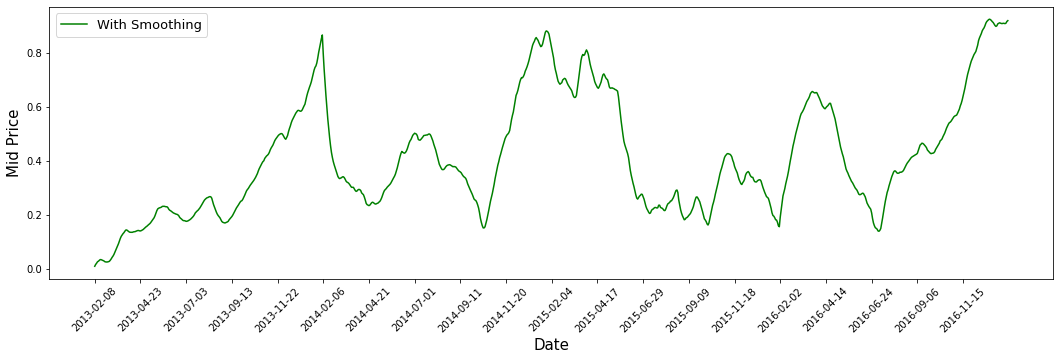

In [88]:
plt.figure(figsize=(18,5))
plt.plot(range(train_data.shape[0]), train_data, color='g', label='With Smoothing')
plt.xticks(range(0, aal.shape[0]-len(test_data), 50), aal['date'][::50], rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Mid Price', fontsize=15)
plt.legend(fontsize=13)
plt.show()